## Fase 5: Análisis de datos


In [37]:
# imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import requests
import json
from bs4 import BeautifulSoup

import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# from loadCredentials import loadCredentials

from sklearn import svm

from funciones_scraping import get_languages
from funciones_tiempo import timeit
from funciones_plot_confusion_matrix import plot_confusion_matrix



%matplotlib inline
pd.options.display.max_columns = None

In [5]:
# Cargamos el dataframe de resultante de la fase 4

df = pd.read_csv('../output/df-limpio-iter3.csv', index_col=0)
df.shape

(11428, 57)

In [ ]:
df.head()

In [9]:
# github y linkedin: sus valors nulos '' han sido reemplazados por NaN. 

### 5.1 Correlación | heatmap

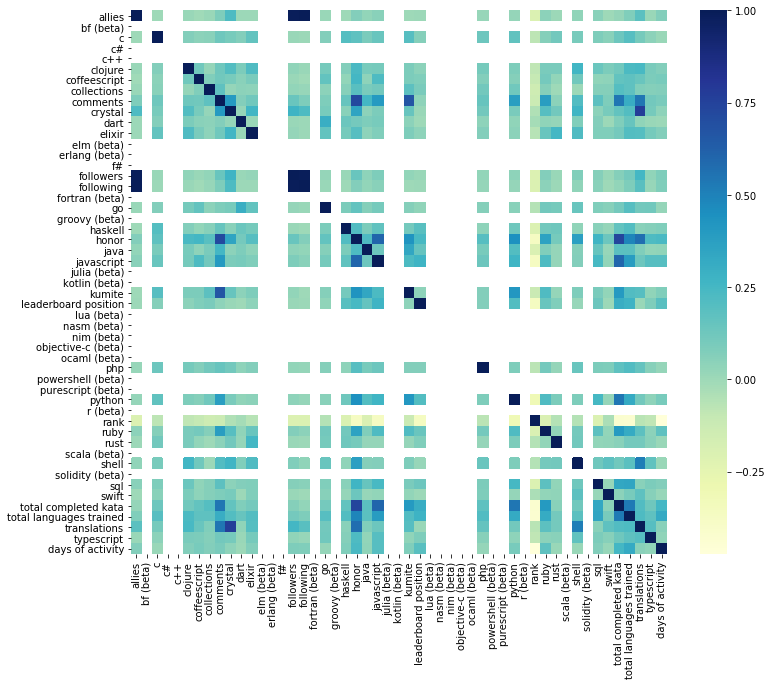

In [10]:
correlation = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(correlation, cmap="YlGnBu")

In [11]:
# Se puede apreciar la alta correlación entre las features sociales: 
# followers, following, allies

correlation.loc['followers', 'allies'], correlation.loc['following', 'allies']

(0.9918985840905662, 0.9996497870945525)

In [12]:
# Podemos eliminar dos de las tres por la alta correlación. 
df.drop(columns=['followers', 'following'], inplace=True)

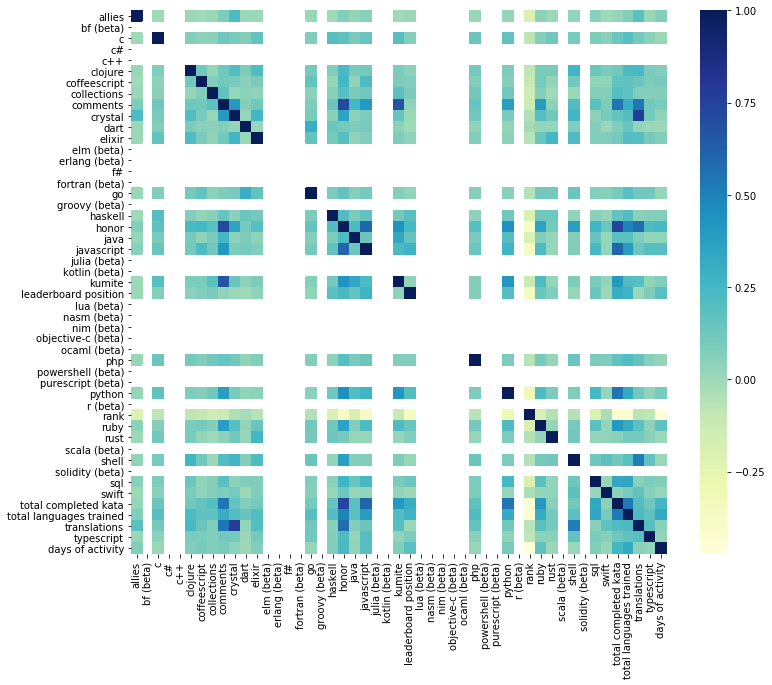

In [13]:
correlation = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(correlation, cmap="YlGnBu")

In [14]:
# TO DO

# hay muchas columnas que están a 0 todos sus valores (las que están en blanco en corr)

for col in df.columns: 
    display(df[col].value_counts().head(5))
    
# Las vamos a eliminar

1.0    1409
0.0    1318
2.0     473
3.0     293
5.0     260
Name: allies, dtype: int64

0.0    11428
Name: bf (beta), dtype: int64

0.0    10658
2.0      157
3.0       53
8.0       44
4.0       39
Name: c, dtype: int64

0.0    11428
Name: c#, dtype: int64

0.0    11428
Name: c++, dtype: int64

0.0    11051
2.0       70
4.0       20
3.0       19
8.0       12
Name: clojure, dtype: int64

0.0    10918
2.0       67
3.0       53
8.0       27
4.0       21
Name: coffeescript, dtype: int64

0.0    10574
1.0      617
2.0       92
3.0       52
4.0       26
Name: collections, dtype: int64

0.0    7786
1.0     980
2.0     508
3.0     311
4.0     220
Name: comments, dtype: int64

0.0    11325
2.0       28
3.0        8
8.0        6
5.0        5
Name: crystal, dtype: int64

0.0    11367
2.0       27
3.0        7
8.0        3
4.0        3
Name: dart, dtype: int64

0.0    11107
2.0       71
4.0       22
8.0       15
5.0       10
Name: elixir, dtype: int64

0.0    11428
Name: elm (beta), dtype: int64

0.0    11428
Name: erlang (beta), dtype: int64

0.0    11428
Name: f#, dtype: int64

0.0    11428
Name: fortran (beta), dtype: int64

0.0    11027
2.0       74
4.0       35
8.0       24
6.0       23
Name: go, dtype: int64

0.0    11428
Name: groovy (beta), dtype: int64

0.0    10440
2.0       80
3.0       43
4.0       39
8.0       23
Name: haskell, dtype: int64

2.0    458
4.0    395
3.0    262
6.0    166
5.0    154
Name: honor, dtype: int64

0.0    8525
2.0     367
4.0     197
3.0     114
8.0      84
Name: java, dtype: int64

0.0    4689
2.0     288
4.0     282
8.0      99
3.0      99
Name: javascript, dtype: int64

0.0    11428
Name: julia (beta), dtype: int64

0.0    11428
Name: kotlin (beta), dtype: int64

0.0    9565
1.0     889
2.0     283
3.0     161
4.0     106
Name: kumite, dtype: int64

2018-12-01    1413
2018-11-01    1286
2018-10-01     875
2018-09-01     663
2018-08-01     580
Name: last seen, dtype: int64

0.0      10682
618.0        2
744.0        2
611.0        2
425.0        2
Name: leaderboard position, dtype: int64

0.0    11428
Name: lua (beta), dtype: int64

2017-01-01    309
2016-11-01    307
2017-03-01    301
2016-12-01    288
2016-10-01    285
Name: member since, dtype: int64

JavaScript    4058
Python        2637
Java          1152
Ruby           740
C#             688
Name: most recent, dtype: int64

0.0    11428
Name: nasm (beta), dtype: int64

0.0    11428
Name: nim (beta), dtype: int64

0.0    11428
Name: objective-c (beta), dtype: int64

0.0    11428
Name: ocaml (beta), dtype: int64

0.0    10766
2.0      112
4.0       35
3.0       27
8.0       25
Name: php, dtype: int64

0.0    11428
Name: powershell (beta), dtype: int64

0.0    11428
Name: purescript (beta), dtype: int64

0.0    6491
2.0     324
4.0     179
3.0     114
8.0     109
Name: python, dtype: int64

0.0    11428
Name: r (beta), dtype: int64

8.0    2231
5.0    2098
4.0    1920
6.0    1818
7.0    1464
Name: rank, dtype: int64

0.0    9219
2.0     126
4.0     105
3.0      66
8.0      41
Name: ruby, dtype: int64

0.0    11188
2.0       53
3.0       21
4.0       15
8.0       10
Name: rust, dtype: int64

0.0    11428
Name: scala (beta), dtype: int64

0.0    11113
2.0       98
3.0       20
5.0       17
6.0       13
Name: shell, dtype: int64

0.0    11428
Name: solidity (beta), dtype: int64

0.0    10274
2.0      134
4.0       54
8.0       38
6.0       35
Name: sql, dtype: int64

0.0    11195
2.0       59
4.0       15
8.0       13
3.0       12
Name: swift, dtype: int64

2.0    654
1.0    580
3.0    389
4.0    283
6.0    227
Name: total completed kata, dtype: int64

1.0    5357
2.0    2690
3.0    1383
4.0     729
5.0     437
Name: total languages trained, dtype: int64

0.0    10815
1.0      190
2.0      107
3.0       61
4.0       34
Name: translations, dtype: int64

0.0    11030
2.0       78
8.0       39
3.0       22
4.0       21
Name: typescript, dtype: int64

Redpath      1
Galaktika    1
Ccortina     1
Adam2017     1
sywesk       1
Name: username, dtype: int64

https://github.com/OG-MrB        1
https://github.com/surfstream    1
https://github.com/ganarajpr     1
https://github.com/rtk-s         1
https://github.com/warnp         1
Name: github, dtype: int64

https://www.linkedin.com/in/enigma-wasp832618135/    1
https://www.linkedin.com/in/omon-ikhide-691b0b38     1
https://www.linkedin.com/in/krisztinavajda           1
https://www.linkedin.com/in/colinbrochard            1
https://linkedin.com/in/mikesprague                  1
Name: linkedin, dtype: int64

0      1682
31      401
61      322
30      247
365     230
Name: days of activity, dtype: int64

In [15]:
df.dtypes

allies                     float64
bf (beta)                  float64
c                          float64
c#                         float64
c++                        float64
clojure                    float64
coffeescript               float64
collections                float64
comments                   float64
crystal                    float64
dart                       float64
elixir                     float64
elm (beta)                 float64
erlang (beta)              float64
f#                         float64
fortran (beta)             float64
go                         float64
groovy (beta)              float64
haskell                    float64
honor                      float64
java                       float64
javascript                 float64
julia (beta)               float64
kotlin (beta)              float64
kumite                     float64
last seen                   object
leaderboard position       float64
lua (beta)                 float64
member since        

### 5.2 Supervised Learning

In [17]:
# Nuestro target (y) será el lenguaje último entrenado. Hay que pasarlo a numérico para 
# hacer la predición

In [18]:
languages = sorted([lan for lan in get_languages()])
languages

['bf (beta)',
 'c',
 'c#',
 'c++',
 'clojure',
 'coffeescript',
 'crystal',
 'dart',
 'elixir',
 'elm (beta)',
 'erlang (beta)',
 'f#',
 'fortran (beta)',
 'go',
 'groovy (beta)',
 'haskell',
 'java',
 'javascript',
 'julia (beta)',
 'kotlin (beta)',
 'lua (beta)',
 'nasm (beta)',
 'nim (beta)',
 'objective-c (beta)',
 'ocaml (beta)',
 'php',
 'powershell (beta)',
 'purescript (beta)',
 'python',
 'r (beta)',
 'ruby',
 'rust',
 'scala (beta)',
 'shell',
 'solidity (beta)',
 'sql',
 'swift',
 'typescript']

In [19]:
# El numérico será el index de la lista

def target_column(x, lista_lenguages=languages): 
    try: 
        res = lista_lenguages.index(x.lower())
    except: 
        res = -1
    return res

df['target'] = df['most recent'].apply(lambda x: target_column(x, languages))

In [20]:
df.dtypes

allies                     float64
bf (beta)                  float64
c                          float64
c#                         float64
c++                        float64
clojure                    float64
coffeescript               float64
collections                float64
comments                   float64
crystal                    float64
dart                       float64
elixir                     float64
elm (beta)                 float64
erlang (beta)              float64
f#                         float64
fortran (beta)             float64
go                         float64
groovy (beta)              float64
haskell                    float64
honor                      float64
java                       float64
javascript                 float64
julia (beta)               float64
kotlin (beta)              float64
kumite                     float64
last seen                   object
leaderboard position       float64
lua (beta)                 float64
member since        

In [21]:
df.target.value_counts()

 17    4058
 28    2637
 16    1152
 30     740
 2      688
 3      409
 15     356
 1      225
 25     183
-1      182
 13     165
 35     158
 8       83
 4       81
 37      78
 36      75
 31      72
 33      33
 5       20
 11      19
 6       10
 7        4
Name: target, dtype: int64

In [22]:
# nos quedamos sólo con las columnas numéricas

# df_numeric = df.select_dtypes(include=['float', 'int64'])  
# df_numeric.dtypes

# df_numeric.to_csv('../output/df-limpio-iter3-numeric.csv')

df_numeric = df.select_dtypes(include=['float', 'int64'])

In [23]:
x_columns = [c for c in df_numeric.columns if c != 'target']
X = df_numeric[x_columns]
y = df_numeric.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9142, 49), (2286, 49), (9142,), (2286,))

#### 5.2.1 SVM (Suport Vector Machine)

In [28]:
# Parámetros por defecto

svm.SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:

clf = svm.SVC(gamma='scale', kernel='rbf') # kernel = poly o linear cuelga el PC
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Computer prediction accuracy

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [46]:
len(x_columns)

49

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0   0   2   2  29   0   7   0   0   0
    0   0   0]
 [  0   7   0   0   0   0   0   0   0   0   1   3  26   0  15   0   0   0
    0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   3  98   0   6   0   0   0
    0   0   0]
 [  0   2  14   0   0   0   0   0   0   0   0   3  57   0  12   0   0   0
    0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   1   0   9   0   1   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  12   0   0   5   0   0
    0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0]
 [  0   0   1   0   0   0   0   0   0   1   0   2  31   0   5   1   0   0
    0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   7   1  43   0   4   1   0 

NameError: name 'np' is not defined

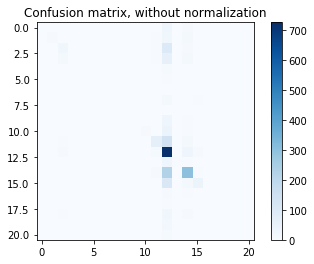

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = x_columns

# conf_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

#### SVM Normalized

In [86]:
# df_numeric.dtypes
df_numeric.columns

Index(['allies', 'bf (beta)', 'c', 'c#', 'c++', 'clojure', 'coffeescript',
       'collections', 'comments', 'crystal', 'dart', 'elixir', 'elm (beta)',
       'erlang (beta)', 'f#', 'fortran (beta)', 'go', 'groovy (beta)',
       'haskell', 'honor', 'java', 'javascript', 'julia (beta)',
       'kotlin (beta)', 'kumite', 'leaderboard position', 'lua (beta)',
       'nasm (beta)', 'nim (beta)', 'objective-c (beta)', 'ocaml (beta)',
       'php', 'powershell (beta)', 'purescript (beta)', 'python', 'r (beta)',
       'rank', 'ruby', 'rust', 'scala (beta)', 'shell', 'solidity (beta)',
       'sql', 'swift', 'total completed kata', 'total languages trained',
       'translations', 'typescript', 'time', 'target'],
      dtype='object')

In [87]:
from sklearn.preprocessing import StandardScaler

x_columns = [c for c in df_numeric.columns if c != 'target']
X = df_numeric[x_columns]
y = df_numeric.target

In [88]:
data = X

scaler = StandardScaler()
scaler.fit(data)
X_sca = scaler.transform(data)
X_train, X_test, y_train, y_test = train_test_split(X_sca, y, test_size=0.20, random_state=42)

/home/alberto/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alberto/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [89]:
clf_norm = svm.SVC(gamma='scale', kernel='rbf') # kernel = poly o linear cuelga el PC
clf_norm.fit(X_train, y_train)
y_pred = clf_norm.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44138232720909887


In [94]:
# Mejores parámetros para el SVC cercanos a los previos

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 20], 'gamma':('auto', 'scale', 'auto_deprecated'), 'coef0': [0.0, 0.1]}

svc_grid = svm.SVC()
clf2 = GridSearchCV(svc_grid, parameters, cv=5)

clf2.fit(X_train, y_train)

clf2.best_params_

# {'C': 10, 'coef0': 0.0, 'gamma': 'scale'}

/home/alberto/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: T

/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alberto/.local/lib/python3.6/site-packages/sklearn/svm/

{'C': 20, 'coef0': 0.0, 'gamma': 'scale'}

In [95]:
clf_grid = svm.SVC(C=20, coef0=0.0, gamma='scale', kernel='rbf') # kernel = poly o linear cuelga el PC
clf_grid.fit(X_train, y_train)
y_pred = clf_grid.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4916885389326334


### 5.3 Unsupervised Learning
* KMeans
* DBScan

#### KMeans

In [19]:
from sklearn.cluster import KMeans

(array([11381.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

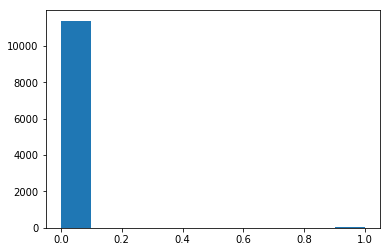

In [20]:
df_numeric = pd.read_csv('../output/df-limpio-iter3-numeric.csv', index_col=0)
X = df_numeric

kmeans = KMeans(n_clusters=2)
cw_kmeans = kmeans.fit(X)
plt.hist(cw_kmeans.labels_)

# Sale una muy mala clasificación

In [ ]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

from sklearn.preprocessing import Normalizer

data = df_numeric
scaler = Normalizer()
scaler.fit(data)
X_norm = scaler.transform(data)

kmeans = KMeans(n_clusters=2)
cw_kmeans = kmeans.fit(X_norm)
plt.hist(cw_kmeans.labels_)

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df_numeric
scaler = StandardScaler()
scaler.fit(data)
X_sca = scaler.transform(data)

kmeans = KMeans(n_clusters=2)
cw_kmeans = kmeans.fit(X_sca)
plt.hist(cw_kmeans.labels_)